In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm

import matplotlib.patches as mpatches

from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', None)

coeffs = ['IP', 'BT', 'NEL', 'PLTH', 'RGEO', 'KAREA', 'EPS', 'MEFF']
path = "../data/"

In [3]:
# REMARK: There are no spherical TOKAMAKs in these analyses.  

DB2P8 = pd.read_csv(path+"DB2P8.csv")
DB5 = pd.read_csv(path+"DB5.csv")

DB2P8 = DB2P8[DB5.columns]

# How was this chosen? Is this a form of removing outliers or noise to the new regression?
# Why not simply use the whole DB5?
new_ids = pd.read_csv(path+"new_point_ids.csv")
                  
R = pd.read_csv(path+"R.csv") #DB5[DB5.id.isin(new_ids.id.values)] #reintroduce dataset

DB2 = DB2P8[["TAUTH"] + coeffs].apply(np.abs).apply(np.log)
DB2["id"] = DB2P8["id"]

reg_data = pd.read_csv(path+"data.csv")

In [4]:
def get_regression_np(_R):
    """
    ASSUMING DATA **IS** GIVEN IN LOG-SCALE
    """    
    data = pd.concat([DB2, _R],
                     axis=0, 
                     ignore_index=True
                    )
    Y_ = data[["TAUTH"]].to_numpy()
    # Adding a column for the intercept
    _df = data[coeffs]; _df.insert(
        loc = 0, 
        column = "intercept", 
        value = np.ones(len(_df))
    )
    X_ = _df.to_numpy()
    n_, p_ = X_.shape
    model = sm.OLS(Y_,X_)
    regression = model.fit()
    return data, regression, (n_,p_)

# Getting regression of DB2P8 only. 
regression_DB2 = get_regression_np(R[R.id.isin([0])])[1]
#regression_DB2.summary()

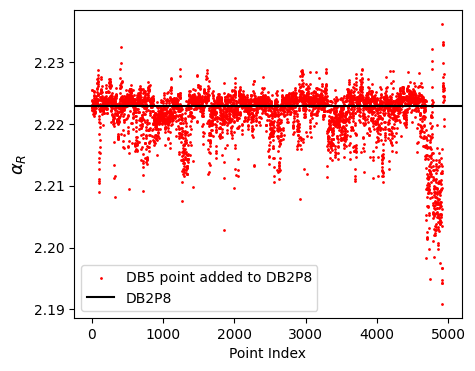

In [5]:
plt.figure(figsize=(5,4))
plt.scatter(reg_data.index, reg_data.αR, s=1, c="r", label="DB5 point added to DB2P8")
plt.axhline(regression_DB2.params[5], c="k", label="DB2P8")
plt.xlabel("Point Index")
plt.ylabel("$\\alpha_R$", fontsize=13)
plt.legend();

In [7]:
# Leave the ones above baseline out -- because we are interested in the reduction of value
pts_minimize = reg_data[reg_data.αR < regression_DB2.params[5] ]
pts_minimize = pts_minimize.sort_values("αR", ascending=True)


# Ordering dataset ids from smallest to greatest alpha-R 

dict_ordered_vals = dict(zip( 
    pts_minimize.id_added.values, 
    list(range(len(pts_minimize)))  
) )

DB5_decreas_pts = R[R.id.isin(pts_minimize.id_added)]
DB5_decreas_pts.insert(0, "ordered", DB5_decreas_pts.id.map(dict_ordered_vals))

DB5_decreas_pts = DB5_decreas_pts.sort_values("ordered")
DB5_decreas_pts = DB5_decreas_pts.set_index("ordered")

In [8]:
DB5_decreas_pts

,ind,id,PHASE,TOK,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF,TAUTH,DATE,SHOT,TIME,Q95,ZEFF,AMIN,VOL,POHM,PNBI,DWDIA,DWMHD,PICRH,PECRH,PL,PFLOSS,TAV,LCOULOMB,QCYL5,TAUBOHM,RHOSTAR,BETASTAR,NUSTAR,OMEGACYCL
ordered,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24915,AEWB71,HSELM,START,-1.541312,-1.261955,1.394014,-1.103826,-1.271538,0.406132,-0.268374,0.530628,-5.494089,19980303,36080,0.043,1.641324,NaN,0.214400,0.381800,331600.000000,0.000000e+00,NaN,0.00,0.0,0.0,3.316000e+05,0.000000,209.663690,13.730101,0.550696,0.000685,-3.105764,2.012665,-2.518349,0.166529
1,24910,UAAXGA,HSELM,START,-1.539912,-1.318262,1.555404,-0.198451,-1.225537,0.406132,-0.273254,0.530628,-6.026470,19971111,34882,0.041,1.732540,NaN,0.223400,0.434000,399900.000000,8.460000e+05,NaN,0.00,0.0,0.0,1.246000e+06,425900.000000,228.006993,13.733277,0.582357,0.000380,-3.048642,2.370540,-2.439489,0.157412
2,24909,53LSPJ,HSELM,START,-1.569256,-1.290984,1.591885,-0.206655,-1.253513,0.399447,-0.267456,0.530628,-6.080077,19971111,34877,0.041,1.791759,NaN,0.218500,0.401000,377100.000000,8.610000e+05,NaN,0.00,0.0,0.0,1.238000e+06,424900.000000,223.630650,13.695656,0.581797,0.000370,-3.063432,2.333085,-2.404223,0.161765
3,24913,FLO8WI,HSELM,START,-1.530165,-1.302321,1.514468,-0.332401,-1.236496,0.411447,-0.278996,0.530628,-5.977956,19980303,36078,0.042,1.677283,NaN,0.219700,0.417300,330600.000000,8.570000e+05,NaN,30000.00,0.0,0.0,1.158000e+06,440400.000000,226.703215,13.748011,0.524587,0.000405,-3.050749,2.291987,-2.527999,0.159941
4,24295,TKCDLW,HSELM,NSTX,0.022339,-0.822352,1.429802,1.184973,-0.169525,0.522481,-0.299376,0.693147,-2.971256,20040427,112453,0.360,1.870158,1.591830,0.625690,10.998600,379567.000000,3.932640e+06,342831.0,824664.00,0.0,0.0,3.487550e+06,216949.000000,815.045625,15.069946,0.597390,0.011257,-3.856249,2.526986,-3.909719,0.219698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,22899,K3O76W,HGELMH,JETILW,0.318147,0.525123,1.078768,2.064701,1.065244,0.414538,-1.138633,0.127254,-1.757736,20160902,91752,46.300,1.276767,1.259928,0.929239,74.859172,268868.583333,8.065248e+06,-34897.4,-46023.60,0.0,0.0,8.393290e+06,510349.400907,1461.643218,15.829536,1.035188,0.256695,-5.590146,0.065075,-2.448271,1.488648
2540,22853,ZD6MZS,HGELMH,JETILW,-0.022501,-0.006447,1.020450,2.111122,1.059800,0.422257,-1.148504,0.000000,-2.460567,20160816,91479,50.000,1.076382,1.297944,0.915117,72.766507,262539.144828,8.743800e+06,3470.7,-4709.79,0.0,0.0,9.002868e+06,745370.607702,826.811861,15.288955,0.827186,0.084838,-5.391758,0.500157,-1.600495,0.993574
2541,15813,ZPPYT0,HGELM,AUGW,-0.002603,0.905432,2.094453,1.743969,0.484892,0.463734,-1.137089,0.693147,-2.358732,20120619,28196,3.250,1.541587,NaN,0.520900,13.820000,256700.000000,4.973000e+06,NaN,21990.00,0.0,1034000.0,6.240000e+06,693100.000000,1139.918698,15.073089,1.208759,0.116899,-5.233002,0.071538,-1.393438,1.236500


In [9]:
reg_coeff_per_pts = np.zeros(len(pts_minimize))
for i in range(1, len(pts_minimize) + 1):
    # Adding one point at a time to DB2P8 from DB5 od decreasing subset in an ordered manner.
    R_ = (DB5_decreas_pts.iloc[:i][["TAUTH"] + coeffs])
    # Storing regression coefficient for alpha_R only
    reg_coeff_per_pts[i-1] = get_regression_np(R_)[1].params[5]
    
DB5_decreas_pts["αR_per_pts_in_DB2"] = reg_coeff_per_pts

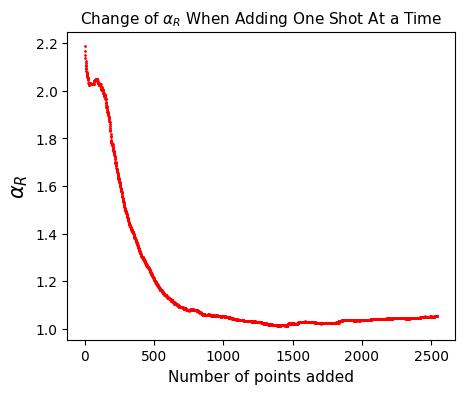

In [10]:
#%matplotlib notebook

plt.figure(figsize=(5,4))
plt.scatter(DB5_decreas_pts.index + 1, DB5_decreas_pts["αR_per_pts_in_DB2"], s=1, c = "r")
plt.xlabel("Number of points added", fontsize=11)
plt.ylabel("$\\alpha_R$", fontsize=15)
plt.title("Change of $\\alpha_R$ When Adding One Shot At a Time", fontsize=11);

In [11]:
# Labeling shots that decreased or increased the overall regression when added
df = DB5_decreas_pts[["αR_per_pts_in_DB2"]]
df.insert(0, "prev_val", [regression_DB2.params[5]] + list(df["αR_per_pts_in_DB2"].iloc[:-1].values))
df.insert(0, "difference", df["αR_per_pts_in_DB2"] - df["prev_val"])
DB5_decreas_pts.insert(0, "decreased", df.difference.apply(lambda x: 1 if x<=0 else 0))
DB5_decreas_pts.insert(0, "weights", DB5_decreas_pts.decreased.values/len(DB5_decreas_pts) + 1 )

In [18]:
DB5_decreas_pts[["id","decreased","weights"]]

,id,decreased,weights
ordered,,,
0,AEWB71,1,1.000393
1,UAAXGA,1,1.000393
2,53LSPJ,1,1.000393
3,FLO8WI,1,1.000393
4,TKCDLW,1,1.000393
...,...,...,...
2539,K3O76W,1,1.000393
2540,ZD6MZS,1,1.000393
2541,ZPPYT0,0,1.000000


In [19]:
#DB5_decreas_pts[["id","decreased","weights"]].to_csv(path+"decreasing_dataset_info.csv", index=False)

In [ ]:
num_samples = 500

"""max_amount = len( DB5_decreas_pts ) + 1
SAMPLES = np.zeros((num_samples, max_amount - 1))

for i in range(num_samples):
    for j in range(1, max_amount):
        R_sampled = DB5_decreas_pts.sample(n=j, weights='weights', random_state=71*(i + 3))
        SAMPLES[i,j-1] = get_regression_np(R_sampled)[1].params[5]""";

In [ ]:
"""for s in range(num_samples):
    plt.plot(range(1, max_amount), SAMPLES[s,], label=f'seed {71*(s + 3)}')
plt.title("Sampling from Decreased Dataset")
plt.xlabel("Number of Random Samples in Decreasing DB5")
plt.ylabel("$\\alpha_R$", fontsize=15)
#plt.savefig("decreased_dataset_500.jpg", format="jpg", dpi=800);""";

In [ ]:
"""for s in range(num_samples):
    print( min(SAMPLES[s,]), np.argmin(SAMPLES[s,]))""";

In [ ]:
#big_dataset = pd.DataFrame(SAMPLES, columns=[f"subset_{i+1}" for i in range(SAMPLES.shape[-1])])
#big_dataset["seed"] = [71*(i + 3) for i in range(num_samples)]
#big_dataset.to_csv(path+"decreased_dataset_random_sampling_500.csv", index=False)

In [ ]:
max_amount_ = len( DB5_decreas_pts[DB5_decreas_pts.decreased.isin([1])] ) + 1
SAMPLES_ = np.zeros((num_samples, max_amount_ - 1))

for i in range(num_samples):
    for j in range(600, max_amount_):
        R_sampled = DB5_decreas_pts.sample(n=j, weights='decreased', random_state=27*(i + 101))
        SAMPLES_[i,j-1] = get_regression_np(R_sampled)[1].params[5]

In [ ]:
decreased_dataset = pd.DataFrame(SAMPLES_[:num_samples,599:], columns=[f"subset_{i+1}" for i in range(599,SAMPLES_.shape[-1])])
decreased_dataset["seed"] = [27*(i + 101) for i in range(num_samples)]
#decreased_dataset.to_csv(path+"decreased_dataset_random_sampling_500_decreasing_points_3.csv", index=False)
decreased_dataset

In [ ]:
for s in range(num_samples):
    plt.scatter(range(1,max_amount_), SAMPLES_[s,], s=1)
plt.title("Decreasing Points")
plt.xlabel("Number of Random Samples in Decreasing DB5")
plt.ylabel("$\\alpha_R$", fontsize=15)

plt.grid(alpha=0.5)
ax = plt.gca()
ax.set_ylim([0.6, 1.01])
ax.set_xlim([600, max_amount_*1.005])

#plt.savefig("decreased_dataset_500_decreased_pts_zoom.jpg", format="jpg", dpi=800);

In [ ]:
"""for s in range(num_samples):
    print( min(SAMPLES_[s,]), np.argmin(SAMPLES_[s,]))"""

In [ ]:
decreased_dataset.describe()

In [ ]:
# Found Subset with Minimum alpha_R
decreased_dataset.describe().loc["min"].keys()[np.argmin(decreased_dataset.describe().loc["min"])]

In [ ]:
# Minimum alpha_R generated by random sampling
min(decreased_dataset.describe().loc["min"]) 

In [ ]:
# Seed that generated the minimum alpha_R with 1466 sampling
indx = decreased_dataset[decreased_dataset["subset_1478"]
                         .isin([ min(decreased_dataset.describe().loc["min"])  ])].index
decreased_dataset["seed"][indx]

In [ ]:
#random_sampling.to_csv(path+"random_sampling_min_subset.csv")

In [ ]:
R_ = DB5_decreas_pts.sample(n=1459, weights='decreased', random_state=2535)
R_

In [ ]:
get_regression_np(R_)[1].params[5]

In [ ]:
#R_[["id"]].to_csv(path+"R_ids_alpha_0.6379.csv", index=False)

In [ ]:
dds_desc = decreased_dataset.describe().T
dds_desc[dds_desc["min"] < 1]

In [ ]:
R_ = DB5_decreas_pts.sample(n=618, weights='decreased', random_state=8023)
R_

In [ ]:
get_regression_np(R_)[1].params[5]

In [ ]:
#R_[["id"]].to_csv(path+"R_ids_alpha_0.9998.csv", index=False)